<div dir=ltr align=center>In the name of God</div>
<br>
<font size=6><div dir=ltr align=center>
<font size=5>
Intelligent Analysis of
Biomedical Images
<br>
<font size=4>
sharif university of technology, CE department
</font>
<br>
<br>
<font size=6>
Homework 1.1
</font><br>
<font size=4>
Classic methods
</font>

**First-Name: Amir Mohammad**

**Last-Name: Ezzati**

**Student-Id: 402212269**

## import google drive and mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/SPB/HW1/"

Mounted at /content/drive


## Imoports and installs

In [ ]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
from pydicom import dcmread
import matplotlib.pyplot as plt
import cv2
from skimage.transform import pyramid_reduce, pyramid_expand
import copy
from scipy.signal import convolve2d

## load and work with DICOM (5)

complete the function `load_I` it should recive the file name and load the provided DICOM file, print its content and return the image in it.

In [ ]:
def load_I(name):
  return dcmread(data_path + name).pixel_array

I=load_I("img.dcm")

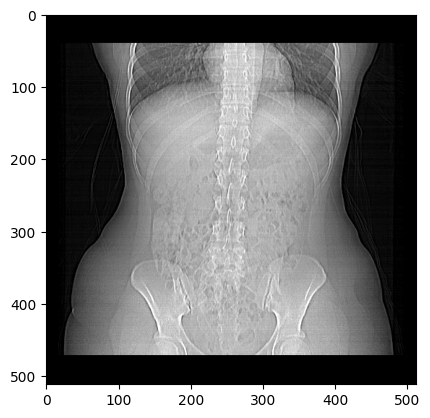

In [ ]:
# I.pixel_array.shapes
plt.imshow(I, cmap="gray")
plt.show()

The cell below, adds some noise to the original image, don't change this code and run the cell.

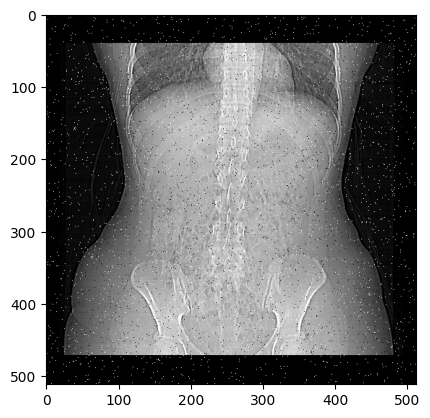

In [ ]:
def add_salt_and_pepper_noise(image, noise_ratio=0.02):
    noisy_image = image.copy()
    h, w= noisy_image.shape
    noisy_pixels = int(h * w * noise_ratio)

    for _ in range(noisy_pixels):
        row, col = np.random.randint(0, h), np.random.randint(0, w)
        if np.random.rand() < 0.5:
            noisy_image[row, col] = 0
        else:
            noisy_image[row, col] = 255

    return noisy_image

I=add_salt_and_pepper_noise(I)
plt.imshow(I, cmap="gray")
plt.show()

## Deniosing (25)

In last section we added some noise to the original image, now you are expected to denoise the noisy image using two diffrent approaches.
1. for the first method you should implement a frequency filter for denoising (low pass filter)
2. for the second method with respect to the nature of the noise we added, you are expected to choose a spatial filter that can reduce the noise. the result depends on the filter you choose and it is expexted that the spatial filter removes as much noise as possible.

you can visualize the denoised results at the end of this section to determine if your methods were succesfull.

then you should compare the results and choose the better denoised image.

### 1) denoising using frequency filters (15)
In this section you are expected to complete the function `low_pass`. function recieves niosy image `I`, converts it to frequncy domain using fourier transform, applys a low pass filter and converts it back to space domain and then returns the result (denoised image) `I_df`.

In [ ]:
def low_pass(I):
  rows, cols = I.shape
  crow,ccol = rows/2 , cols/2
  crow = np.int32(crow)
  ccol = np.int32(ccol)

  f = np.fft.fft2(I)
  fshift = np.fft.fftshift(f)

  x_lim = 70
  y_lim = 70

  hp_mask = np.ones_like(fshift, dtype=np.bool8) # low pass mask
  hp_mask[(crow-x_lim):(crow+x_lim+1), (ccol-y_lim):(ccol+y_lim+1)] = 0

  # mask out high frequencies
  fshift[hp_mask] = 0

  #fshift = fshift/(x_lim*y_lim)
  f_ishift = np.fft.ifftshift(fshift)
  img_back = np.fft.ifft2(f_ishift)
  img_back = np.real(img_back)
  return(img_back)


I_df=low_pass(I)

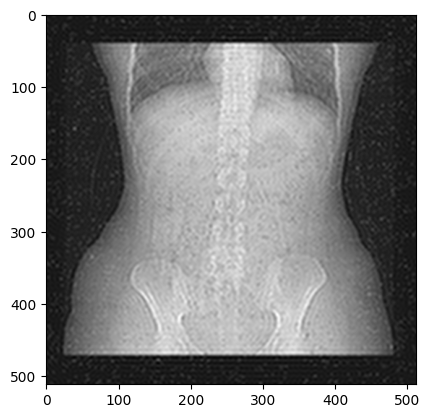

In [ ]:
plt.imshow(I_df, cmap="gray")
plt.show()

### 2) denoising using spatial filters (5)

In this section you are expected to complete the function `denoise_spatial`. function recieves niosy image `I`, applies a spatial filter on it to denoise it and returns the denoised image `I_ds`.

In [ ]:
def denoise_spatial(I):
  # Average
  # mask = np.ones([3, 3], dtype = int)
  # mask = mask / 9
  # I_ds = convolve2d(I, mask, 'same')

  # Median
  I_ds = cv2.medianBlur(I,5)

  return I_ds


I_ds=denoise_spatial(I)

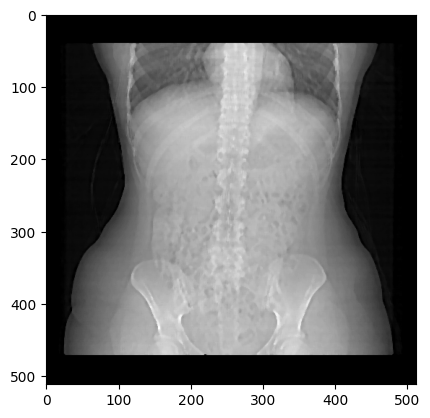

In [ ]:
plt.imshow(I_ds, cmap="gray")
plt.show()

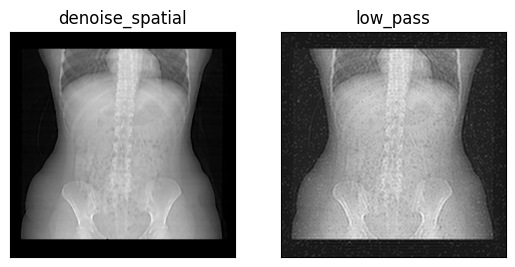

In [ ]:
plt.subplot(121),plt.imshow(I_ds, cmap = 'gray')
plt.title('denoise_spatial'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_df, cmap = 'gray')
plt.title('low_pass'), plt.xticks([]), plt.yticks([])
plt.show()

### Question (5)

wich denoising method performed better? how is it related to the type and nature of the noise?

The median filter which is a spatial filter performs better in this case because the median filter works by replacing the value of each pixel with the median value of its neighboring pixels. This process is repeated for every pixel in the image, and it effectively removes the salt-and-pepper noise while preserving the edges and details of the image.

Compared to other filters, such as averaging filters, median filters are more effective at removing salt-and-pepper noise because they do not blur the edges of the image.



assign your chosen result of denoising to `I` for next section.

In [ ]:
I=I_ds
#I=I_df

## Global Sharpening (15)

Denoising images usualy result in less detailed blury images, therfore it is desirable to sharpen the denoised image.
for this means we have to amplify image details by first extracting them and then adding them to the image.

in this section you are expected to sharpen the image as described, once by using high pass filter and once by a spatial filter that can extract details (like edge detection filters).

### 1) sharpening using high pass filter (10)
complete the function `high_pass`.it recives image `I` converts it to frequncy domain using fourier transform, applies a high pass filter and converts it back to space domain and then returns the result (details of the image) `detail_I`.

hint: you can use the low pass filter you implemented earlier.

In [ ]:
def high_pass(I):
  rows, cols = I.shape
  crow,ccol = rows/2 , cols/2
  crow = np.int32(crow)
  ccol = np.int32(ccol)

  f = np.fft.fft2(I)
  fshift = np.fft.fftshift(f)

  x_lim = 32
  y_lim = 32

  lp_mask = np.zeros_like(fshift, dtype=np.bool8) # low pass mask
  lp_mask[(crow-x_lim):(crow+x_lim+1), (ccol-y_lim):(ccol+y_lim+1)] = 1

  # mask out low frequencies
  fshift[lp_mask] = 0

  f_ishift = np.fft.ifftshift(fshift)
  img_back = np.fft.ifft2(f_ishift)
  img_back = np.real(img_back)
  return(img_back)

detail_I = high_pass(I)
I_sharp_hi=I+detail_I

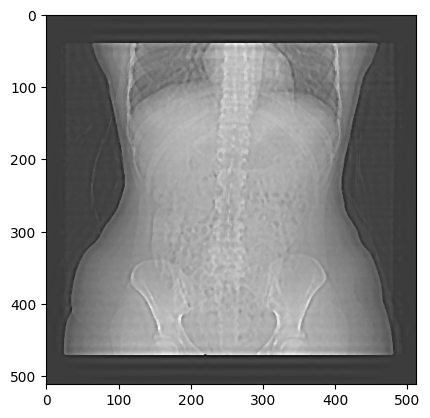

In [ ]:
plt.imshow(I_sharp_hi, cmap="gray")
plt.show()

### 2) sharpening using a spatial filter (5)
complete the function `detail_spatial`.it recives image `I` applies a spatial filter on it that can extract image details and returns the result (details of the image) `detail_I`.

hint: search for edge detection spatial filters.

In [ ]:
from scipy.signal import convolve2d
def detail_spatial(I):

  filter = np.array([[0, -1, 0],
                     [-1, 4, -1],
                     [0, -1, 0]])

  I_detail = convolve2d(I, filter, 'same')
  return I_detail

detail_I = detail_spatial(I)
I_sharp_spatial=I+detail_I

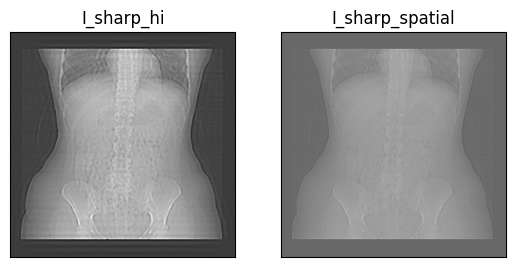

In [ ]:
plt.subplot(121),plt.imshow(I_sharp_hi, cmap = 'gray')
plt.title('I_sharp_hi'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_sharp_spatial, cmap = 'gray')
plt.title('I_sharp_spatial'), plt.xticks([]), plt.yticks([])
plt.show()

## Multi-scale image enhancement (40)

In this section you are expected to implement multi-scale image enhancement. You should build pyramid of detail with your preferd enhancment method (you can use the high pass filter you implemented) and add it to the original image level by level.

complete the function `multi_enhance`. it recives the image `I` performs the explained enhancment and returns the result.

you can write other functions as needed to be called in the `multi_enhance` function.

In [ ]:
# this approach is taken from https://github.com/lafith/pymusica

def isPowerofTwo(x):
    # check if number x is a power of two
    return x and (not(x & (x - 1)))


def findNextPowerOf2(n):
    n = n - 1
    # do till only one bit is left
    while n & n - 1:
        n = n & n - 1
    return n << 1

def resize_image(img):
    row, col = img.shape
    # check if dimensions are power of two
    # if not pad the image accordingly
    print("Calculating how much padding is required...")
    if isPowerofTwo(row):
        rowdiff = 0
    else:
        nextpower = findNextPowerOf2(row)
        rowdiff = nextpower - row

    if isPowerofTwo(col):
        coldiff = 0
    else:
        nextpower = findNextPowerOf2(col)
        coldiff = nextpower - col

    img_ = np.pad(img, ((0, rowdiff), (0, coldiff)), 'reflect')
    print('Image padded from [{},{}] to [{},{}]'.format(
                img.shape[0], img.shape[1],
                img_.shape[0], img_.shape[1]))
    return img_

In [ ]:
def gaussian_pyramid(img, L):
    # Gaussian Pyramid
    tmp = copy.deepcopy(img)
    gp = [tmp]
    for layer in range(L):
        tmp = pyramid_reduce(tmp, preserve_range=True)
        gp.append(tmp)

    return gp


def laplacian_pyramid(img, L):
    gauss = gaussian_pyramid(img, L)

    # Laplacian Pyramid:
    lp = []
    for layer in range(L):
        tmp = pyramid_expand(gauss[layer+1], preserve_range=True)
        tmp = gauss[layer] - tmp
        lp.append(tmp)
    lp.append(gauss[L])

    return lp, gauss


def reconstruct_image(laplacian, L):
    # Reconstructing original image from laplacian pyramid
    rs = laplacian[L]
    for i in range(L-1, -1, -1):
        rs = pyramid_expand(rs, preserve_range=True)
        rs = np.add(rs, laplacian[i])

    return rs

def enhance_coefficients(laplacian, L, params):
    # Non linear operation goes here:
    M = params['M']
    p = params['p']
    a = params['a']
    for layer in range(L):
        x = laplacian[layer]
        # removing all negative coefficients:
        # an attempt to reduce double edges
        x[x < 0] = 0.0
        G = a[layer]*M
        laplacian[layer] = G*np.multiply(
            np.divide(
                x, np.abs(x), out=np.zeros_like(x), where=x != 0),
            np.power(
                np.divide(
                    np.abs(x), M), p))
    return laplacian


def musica1(img, L, params):
    img_resized = resize_image(img)
    lp, _ = laplacian_pyramid(img_resized, L)
    lp = enhance_coefficients(lp, L, params)
    rs = reconstruct_image(lp, L)
    rs = rs[:img.shape[0], :img.shape[1]]
    return rs

Calculating how much padding is required...
Image padded from [512,512] to [512,512]


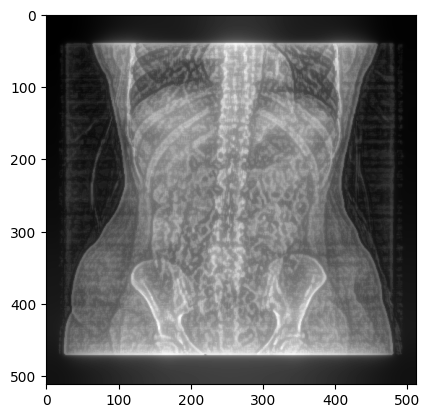

In [ ]:
L = 9
a = np.full(L, 11)
params = {
          'M': 255.0,
          'a': a,
          'p': 0.4
          }

I_e=musica1(I, L, params)
plt.imshow(I_e, cmap = 'gray')

In [ ]:
# appproach 2
# this approach is taken from Dr. Rohban notebook for MUSICA
def up_sample_blur(I):
    I_e = cv2.pyrUp(I)

    return(I_e)

def down_sample(I):
    I_d = cv2.pyrDown(I)

    return(I_d)

def image_pyramid(I, n_levels):
    lst = list()

    I = np.float32(I)

    for i in range(0, n_levels):
        I_d = down_sample(I)
        D = I - up_sample_blur(I_d)
        lst.append(D)

        I = I_d

    lst.append(I)

    return(lst)

def image_pyramid_rec(lst, n_levels):

    I = lst[n_levels]

    for i in range(n_levels, 0, -1):
        I = up_sample_blur(I) + lst[i-1]

    return(I)

def global_enhancement(I):
    return(np.tanh(I/16) * max(np.max(I), np.abs(np.min(I))))

def musica2(img, L):
  prm = image_pyramid(img, L)
  for i in range(L):
    prm[i] = global_enhancement(prm[i])

  I_e = image_pyramid_rec(prm, 3)
  return I_e

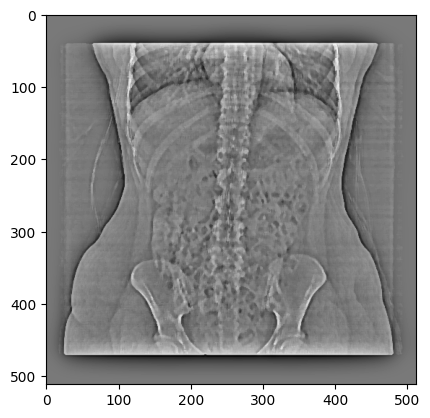

In [ ]:
I_e=musica2(I, 9)
plt.imshow(I_e, cmap = 'gray')

Calculating how much padding is required...
Image padded from [512,512] to [512,512]


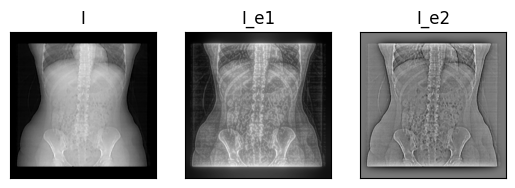

In [ ]:
def multi_enhance(I, L, num):
  a = np.full(L, 11)
  params = {
          'M': 255.0,
          'a': a,
          'p': 0.4
          }

  return musica1(I, L, params) if num == 1 else musica2(I, L)

I_e1=multi_enhance(I, 9, 1)
I_e2=multi_enhance(I, 9, 2)

plt.subplot(131),plt.imshow(I, cmap = 'gray')
plt.title('I'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(I_e1, cmap = 'gray')
plt.title('I_e1'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(I_e2, cmap = 'gray')
plt.title('I_e2'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
I=I_e1

## Gray level enhancment (15)

using gray level enhancment try to enhance the contrast of last sections result.
you have to complete the function `gray_enhance` it recives an image `I` and returns the enhanced image `I_c`

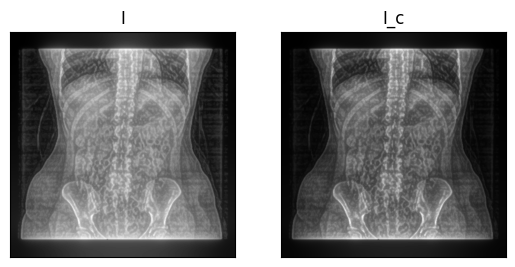

In [ ]:
def gray_enhance(I):
  gamma = 1.7
  I_c = np.power(I, gamma)
  I_c /= np.max(I_c)

  return I_c

I_c=gray_enhance(I)
plt.subplot(121),plt.imshow(I, cmap = 'gray')
plt.title('I'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_c, cmap = 'gray')
plt.title('I_c'), plt.xticks([]), plt.yticks([])
plt.show()